### AIM:
> * To design a DNN with minimum accuracy of 99.2 %

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

* Loading the data-set

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


* Reshaping and Normalization

In [3]:
No_of_pixels=x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


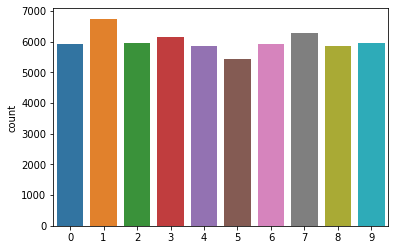

In [6]:
g=sns.countplot(y_train)

In [0]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

*  Splitting the dataset into training, testing and validation datasets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

* Data Augmentation

In [0]:
data_generator=ImageDataGenerator()

* Pre-Processing the data-set

* The Hyper-Parameters

In [0]:
No_epochs=30
input_shape=(28,28,1)
learning_rate=0.5
dropout_rate=0.3
batch_size=128

* The Structure of the Deep Neural Network/ The Architecture of the DNN

In [0]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

* Training the DNN

In [0]:
model.fit(x=x_train,y=y_train, batch_size=128,epochs=15)

* Plotting the loss v/s epochs graph

* Evaluating the accuracy

In [0]:
model.evaluate(x_test, y_test)

* Saving the model

* Random Testing 